# Hypothesis 7: "Travel Within Counties Contributed to Increased Cases"


In [8]:
import pandas as pd
from datetime import datetime
import re

file = "case_clean.csv"
cases = pd.read_csv(file, index_col=0)
#cases = cases.truncate(before=0, after=253)
#cases = cases.set_index('County')
cases = cases.drop(['mean', 'total']) # we will not need these for now


pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in cases.keys()]
for idx in range(len(dates)):
    dates[idx] = dates[idx].replace(year = 2020) #Make sure year is 2020 so it can work with other data

cases.columns=[sub for sub in dates]
cases

,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-15,2020-03-16,...,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20
anderson,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2760.0,2763.0,2763.0,2762.0,2776.0,2799.0,2812.0,1744.0,1741.0,1741.0
andrews,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,400.0,400.0,400.0,400.0,400.0,406.0,410.0,412.0,412.0,412.0
angelina,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2072.0,2072.0,2072.0,2072.0,2072.0,2072.0,2094.0,2113.0,2113.0,2113.0
aransas,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,299.0,302.0,302.0,302.0,302.0,307.0,308.0,310.0,316.0,316.0
archer,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,67.0,67.0,68.0,68.0,67.0,69.0,69.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wood,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,451.0,452.0,452.0,452.0,466.0,472.0,477.0,491.0,496.0,496.0
yoakum,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,183.0,183.0,183.0,183.0,190.0,199.0,198.0,198.0,201.0,201.0
young,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243.0,246.0,246.0,246.0,252.0,258.0,259.0,266.0,266.0,266.0
zapata,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,317.0,317.0,317.0,317.0,320.0,321.0,323.0,325.0,326.0,326.0


In [9]:
file = "apple_texas_counties_clean.csv"
apple = pd.read_csv(file)
apple.drop(['Unnamed: 0', 'geo_type', 'alternative_name', 'sub-region', 'country'], inplace=True, axis=1)
for idx in range(len(apple['region'])):
    apple['region'][idx] = apple['region'][idx].replace(" County", "")
    
#apple = apple.set_index('region')


<ipython-input-9-3cca8104e2a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['region'][idx] = apple['region'][idx].replace(" County", "")


In [10]:
apple

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17
0,Anderson,driving,100.0,113.99,109.88,117.23,151.22,154.66,116.83,115.89,...,152.54,175.09,193.07,227.81,200.75,153.53,178.04,173.15,175.97,175.84
1,Andrews,driving,100.0,90.29,97.36,96.22,100.63,87.71,53.57,96.08,...,94.02,101.51,99.21,107.23,91.03,64.39,97.89,105.19,109.92,115.07
2,Angelina,driving,100.0,97.89,98.63,106.86,133.41,116.91,85.23,108.98,...,146.72,147.70,158.69,186.60,169.52,121.19,145.70,144.04,148.96,149.65
3,Aransas,driving,100.0,102.97,103.57,108.44,127.49,144.68,115.93,118.86,...,151.06,142.24,159.16,231.22,254.45,201.83,151.98,161.60,147.34,165.70
4,Atascosa,driving,100.0,107.46,101.70,107.83,131.93,111.05,93.95,108.43,...,112.91,112.42,114.96,148.58,138.92,124.08,117.43,117.11,111.86,135.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Winkler,driving,100.0,122.67,120.30,107.14,101.96,78.00,61.94,100.54,...,82.78,89.92,83.40,90.99,72.91,40.07,72.42,106.20,89.02,82.69
219,Wise,driving,100.0,102.72,100.75,94.50,116.26,121.84,87.40,104.90,...,144.42,124.74,138.07,171.71,181.03,125.41,139.99,134.30,139.93,151.85
220,Wood,driving,100.0,91.84,97.95,89.74,116.75,117.24,83.00,103.19,...,137.83,138.16,150.39,176.39,175.27,122.93,135.66,148.24,147.39,161.99
221,Yoakum,driving,100.0,111.01,103.92,100.26,112.71,62.37,77.30,99.32,...,104.44,85.49,101.62,127.30,69.62,69.88,88.99,94.11,107.85,103.41


In [11]:
#Now we want to only look at the mobile data for the dates we have in cases data.
#Cases has dates that are not in apple, so we are going to filter them out
apple2 = {}
apple2['region'] = apple['region']
apple2['transportation_type'] = apple['transportation_type']
apple2.keys()

dict_keys(['region', 'transportation_type'])

In [12]:
#Trim the dates from the apple data to match the case data
for date in dates:
    for column in apple.keys():
        if column != 'transportation_type' and column != 'region':
            if datetime.strptime(column, '%Y-%m-%d') == date:
                apple2[column] = apple[column]
                #print("match: ", column)


In [13]:
#Check that it worked
print(cases.keys())
print(apple2.keys())

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-15', '2020-03-16',
               ...
               '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14',
               '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18',
               '2020-09-19', '2020-09-20'],
              dtype='datetime64[ns]', length=198, freq=None)
dict_keys(['region', 'transportation_type', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '

In [14]:
#Now we need to make sure the case data matches apple data (it has a few too many entries)
for column in cases.keys():
    if not datetime.strftime(column, '%Y-%m-%d') in apple2:
        cases.drop([column], inplace=True, axis=1)
        print('drop: ', column.date())
cases

drop:  2020-09-18
drop:  2020-09-19
drop:  2020-09-20


,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-15,2020-03-16,...,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17
anderson,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2694.0,2744.0,2776.0,2760.0,2763.0,2763.0,2762.0,2776.0,2799.0,2812.0
andrews,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,388.0,388.0,394.0,400.0,400.0,400.0,400.0,400.0,406.0,410.0
angelina,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2013.0,2045.0,2045.0,2072.0,2072.0,2072.0,2072.0,2072.0,2072.0,2094.0
aransas,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,298.0,298.0,299.0,299.0,302.0,302.0,302.0,302.0,307.0,308.0
archer,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,63.0,64.0,67.0,67.0,67.0,67.0,68.0,68.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wood,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,420.0,428.0,449.0,451.0,452.0,452.0,452.0,466.0,472.0,477.0
yoakum,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,173.0,173.0,173.0,183.0,183.0,183.0,183.0,190.0,199.0,198.0
young,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.0,238.0,238.0,243.0,246.0,246.0,246.0,252.0,258.0,259.0
zapata,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,295.0,317.0,317.0,317.0,317.0,317.0,317.0,320.0,321.0,323.0


In [15]:
#Now turn apple2 into a dataframe object for better handling
apple2 = pd.DataFrame.from_dict(apple2)
print(apple2.index)

RangeIndex(start=0, stop=223, step=1)


In [16]:
#Check apple2's keys for reference
apple2

,region,transportation_type,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,...,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17
0,Anderson,driving,120.72,147.52,185.64,136.32,141.91,141.37,160.35,169.96,...,152.54,175.09,193.07,227.81,200.75,153.53,178.04,173.15,175.97,175.84
1,Andrews,driving,96.45,108.60,122.74,100.60,131.59,121.46,110.04,111.66,...,94.02,101.51,99.21,107.23,91.03,64.39,97.89,105.19,109.92,115.07
2,Angelina,driving,108.15,124.85,159.96,121.03,130.86,130.15,130.92,148.50,...,146.72,147.70,158.69,186.60,169.52,121.19,145.70,144.04,148.96,149.65
3,Aransas,driving,119.47,146.50,215.78,184.37,200.46,205.13,218.67,252.70,...,151.06,142.24,159.16,231.22,254.45,201.83,151.98,161.60,147.34,165.70
4,Atascosa,driving,114.92,122.28,161.84,136.54,134.79,141.76,143.44,159.65,...,112.91,112.42,114.96,148.58,138.92,124.08,117.43,117.11,111.86,135.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Winkler,driving,114.99,118.79,112.36,106.38,128.87,136.23,113.48,109.24,...,82.78,89.92,83.40,90.99,72.91,40.07,72.42,106.20,89.02,82.69
219,Wise,driving,98.12,119.01,150.82,111.54,120.84,115.62,129.67,136.80,...,144.42,124.74,138.07,171.71,181.03,125.41,139.99,134.30,139.93,151.85
220,Wood,driving,105.86,119.84,148.64,122.71,134.59,130.60,140.48,138.08,...,137.83,138.16,150.39,176.39,175.27,122.93,135.66,148.24,147.39,161.99
221,Yoakum,driving,95.05,122.01,140.10,119.37,119.54,119.45,119.20,128.50,...,104.44,85.49,101.62,127.30,69.62,69.88,88.99,94.11,107.85,103.41


In [17]:
#The apple data contains three types of mobile data: driving, walking, and (something else I can't remember)
#Not all of the counties have all the types of data.
#Some counties only have one type of data, and some have all three.
#So we want to take the average of all the types of data for each date in each county.

apple_means = pd.DataFrame(columns=(apple2.keys()))
apple_means.drop(['transportation_type'], inplace=True, axis=1)
apple_means.drop(['region'], inplace=True, axis=1)
print(apple_means.keys())

Index(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-15', '2020-03-16',
       ...
       '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12',
       '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17'],
      dtype='object', length=195)


In [18]:
temp = {}
cnt = 0
tally = 0

#We know the first county in the DF is Anderson, so we'll start there.
region = "Anderson"
#apple_means['region'] = region
#apple_means = apple_means.set_index('region')

for r in apple2.index:
    #If the new region is the same as the last region we were looking at..
    if apple2['region'][r] == region:
        for column in apple2.keys():
            #Go through all of the dates
            if column != 'transportation_type' and column != 'region':
                if column in temp:
                    #if the date is already in the temp list, combine it
                    temp[column] = temp[column] + apple2.at[r, column]
                else:
                    temp[column] = apple2.at[r, column]
        cnt = cnt + 1 #Increase the count. This is for averaging
    else:
        #The new region is different from the last one, so we're going to get the average of the last region
        for column in temp.keys():
            temp[column] = temp[column] / cnt
        #Now we add the county row onto the apple_means df
        #print(len(temp.keys()))
        #print(apple_means.keys())
        apple_means.loc[region] = temp 
        cnt = 0 #Start the count all over again
        region = apple2['region'][r]
        temp = {}
        
        #Ok now add the new data from this row
        for column in apple2.keys():
            if column != "transportation_type" and column != 'region':
                temp[column] = apple2.at[r, column]
        cnt = cnt + 1

#apple_means

In [19]:
apple_means

,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-15,2020-03-16,...,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17
Anderson,120.72,147.52,185.64,136.32,141.91,141.37,160.35,169.96,118.58,126.28,...,152.54,175.09,193.07,227.81,200.75,153.53,178.04,173.15,175.97,175.84
Andrews,96.45,108.60,122.74,100.60,131.59,121.46,110.04,111.66,55.56,84.47,...,94.02,101.51,99.21,107.23,91.03,64.39,97.89,105.19,109.92,115.07
Angelina,108.15,124.85,159.96,121.03,130.86,130.15,130.92,148.50,94.47,102.10,...,146.72,147.70,158.69,186.60,169.52,121.19,145.70,144.04,148.96,149.65
Aransas,119.47,146.50,215.78,184.37,200.46,205.13,218.67,252.70,183.88,155.25,...,151.06,142.24,159.16,231.22,254.45,201.83,151.98,161.60,147.34,165.70
Atascosa,114.92,122.28,161.84,136.54,134.79,141.76,143.44,159.65,123.55,109.94,...,112.91,112.42,114.96,148.58,138.92,124.08,117.43,117.11,111.86,135.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wilson,115.13,115.77,134.20,114.04,122.09,120.08,114.16,123.64,82.21,95.33,...,106.41,110.73,121.63,144.67,136.33,99.55,114.07,126.03,117.82,130.85
Winkler,114.99,118.79,112.36,106.38,128.87,136.23,113.48,109.24,57.12,100.85,...,82.78,89.92,83.40,90.99,72.91,40.07,72.42,106.20,89.02,82.69
Wise,98.12,119.01,150.82,111.54,120.84,115.62,129.67,136.80,95.02,90.89,...,144.42,124.74,138.07,171.71,181.03,125.41,139.99,134.30,139.93,151.85
Wood,105.86,119.84,148.64,122.71,134.59,130.60,140.48,138.08,94.58,97.65,...,137.83,138.16,150.39,176.39,175.27,122.93,135.66,148.24,147.39,161.99


In [20]:
#Save the filtered/means data to a csv
apple_means.to_csv(r'apple_counties_filtered.csv')

In [21]:
apple_means

,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-15,2020-03-16,...,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17
Anderson,120.72,147.52,185.64,136.32,141.91,141.37,160.35,169.96,118.58,126.28,...,152.54,175.09,193.07,227.81,200.75,153.53,178.04,173.15,175.97,175.84
Andrews,96.45,108.60,122.74,100.60,131.59,121.46,110.04,111.66,55.56,84.47,...,94.02,101.51,99.21,107.23,91.03,64.39,97.89,105.19,109.92,115.07
Angelina,108.15,124.85,159.96,121.03,130.86,130.15,130.92,148.50,94.47,102.10,...,146.72,147.70,158.69,186.60,169.52,121.19,145.70,144.04,148.96,149.65
Aransas,119.47,146.50,215.78,184.37,200.46,205.13,218.67,252.70,183.88,155.25,...,151.06,142.24,159.16,231.22,254.45,201.83,151.98,161.60,147.34,165.70
Atascosa,114.92,122.28,161.84,136.54,134.79,141.76,143.44,159.65,123.55,109.94,...,112.91,112.42,114.96,148.58,138.92,124.08,117.43,117.11,111.86,135.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wilson,115.13,115.77,134.20,114.04,122.09,120.08,114.16,123.64,82.21,95.33,...,106.41,110.73,121.63,144.67,136.33,99.55,114.07,126.03,117.82,130.85
Winkler,114.99,118.79,112.36,106.38,128.87,136.23,113.48,109.24,57.12,100.85,...,82.78,89.92,83.40,90.99,72.91,40.07,72.42,106.20,89.02,82.69
Wise,98.12,119.01,150.82,111.54,120.84,115.62,129.67,136.80,95.02,90.89,...,144.42,124.74,138.07,171.71,181.03,125.41,139.99,134.30,139.93,151.85
Wood,105.86,119.84,148.64,122.71,134.59,130.60,140.48,138.08,94.58,97.65,...,137.83,138.16,150.39,176.39,175.27,122.93,135.66,148.24,147.39,161.99


In [22]:
#Now get the dates from the apple_means DF for the plot below
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
dates2 = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in apple_means.keys()]


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


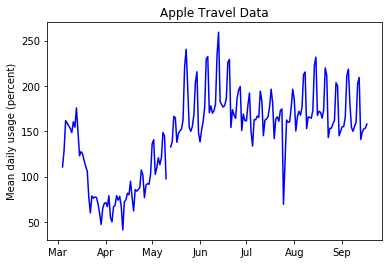

In [23]:
#######
## Testing out visualizations::

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#Plot to make sure everything looks right

ax= plt.gca()

ax.title.set_text('Apple Travel Data')
ax.set_ylabel('Mean daily usage (percent)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.plot(dates2, apple_means.T['Nueces'], color="blue")



In [24]:
cases.keys()

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-15', '2020-03-16',
               ...
               '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
               '2020-09-16', '2020-09-17'],
              dtype='datetime64[ns]', length=195, freq=None)

In [25]:
#I need to update 'dates' again
dates3 = [cases.keys()]
dates3

[DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09',
                '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
                '2020-03-15', '2020-03-16',
                ...
                '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
                '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
                '2020-09-16', '2020-09-17'],
               dtype='datetime64[ns]', length=195, freq=None)]

In [26]:
#There's some missing data in May, so we will just interpolate to bridge that gap.
apple_means = apple_means.interpolate(axis=1)

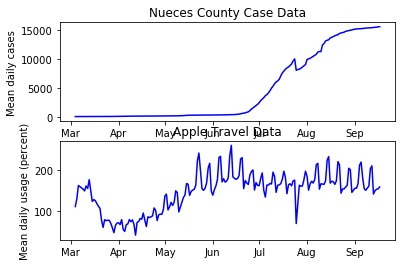

In [27]:
fig, (ax2, ax1) = plt.subplots(2)
#plt.ylim(bottom=0)

#ax2= plt.gca()
#ax2 = fig.add_subplot(1,2,1)
ax2.title.set_text('Nueces County Case Data')
ax2.set_ylabel('Mean daily cases')
ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.plot(cases.T['nueces'], color="blue")

#ax = fig.add_subplot(1,2,2)
ax1.title.set_text('Apple Travel Data')
ax1.set_ylabel('Mean daily usage (percent)')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.plot(dates2, apple_means.T['Nueces'], color="blue")


In [28]:
#Ok time to analyze it!
#Let's transpose both datasets

appleT = apple_means.T
casesT = cases.T

appleT.columns = appleT.columns.str.lower()
casesT.columns = casesT.columns.str.lower()

In [29]:
#There are some counties included in the Cases data that are not representing in the Apple data
#For now, we will only look at the counties we currently have all data for.
for column in casesT.keys():
    if not column in appleT.columns:
        casesT.drop([column], inplace=True, axis=1)

In [30]:
casesT = casesT.diff(axis=0)
casesT = casesT.fillna(0)
casesT

,anderson,andrews,angelina,aransas,atascosa,austin,bandera,bastrop,bee,bell,...,wheeler,wichita,wilbarger,willacy,williamson,wilson,winkler,wise,wood,yoakum
2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-14,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-15,14.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,14.0,...,1.0,27.0,4.0,10.0,84.0,2.0,3.0,14.0,14.0,7.0
2020-09-16,23.0,6.0,0.0,5.0,6.0,7.0,1.0,8.0,-17.0,105.0,...,0.0,21.0,3.0,4.0,25.0,3.0,0.0,2.0,6.0,9.0


# Analysis

Right now I'm just looking at the data from one county. Ideally, we will do this for all the counties.

Possible approaches:
1. Get the results for each county. Tally how many are significant and how many are not significant. The majority determines the outcome?
1. Get the data for all counties and add them. Then get results for all counties. 

## OLS
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

This section needs to be double-checked. I'm not entirely sure if I did this part right.

In [31]:
#Now we begin analyis
#I'm first just messing around with a few different types of analysis

import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests
#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_anova = pd.DataFrame()
df_anova['cases'] = casesT['nueces'].astype(float)
a = appleT['nueces']
df_anova = df_anova.join(a)
df_anova = df_anova.rename(columns={'nueces':'apple'})
df_anova = df_anova.fillna(0)
df_anova

,cases,apple
2020-03-04,0.0,110.695
2020-03-05,0.0,129.060
2020-03-06,0.0,161.820
2020-03-09,0.0,153.070
2020-03-10,0.0,148.580
...,...,...
2020-09-13,38.0,141.030
2020-09-14,21.0,149.105
2020-09-15,21.0,152.645
2020-09-16,64.0,153.510


In [32]:
#Smooth out the values so it's easier to compare
#Take this out later if necessary
rollingMean = df_anova.rolling(window=7, min_periods=1).mean()
rollingMean

,cases,apple
2020-03-04,0.000000,110.695000
2020-03-05,0.000000,119.877500
2020-03-06,0.000000,133.858333
2020-03-09,0.000000,138.661250
2020-03-10,0.000000,140.645000
...,...,...
2020-09-13,24.714286,167.525000
2020-09-14,25.714286,166.793571
2020-09-15,22.571429,167.176429
2020-09-16,30.000000,166.900000


In [33]:
#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
Y = rollingMean['cases']
X = rollingMean['apple']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.params

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const   -104.251198
apple      1.253131
dtype: float64

In [34]:
results.tvalues

const   -3.501170
apple    6.395872
dtype: float64

In [35]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          -104.2512     29.776     -3.501      0.001    -162.980     -45.523


In [36]:
print(results.f_test(np.identity(2)))

<F test: F=array([[68.82910609]]), p=2.7300876445211936e-23, df_denom=193, df_num=2>


## T-Test

Trying this out as well, just to see how it goes.

In [37]:
#ttest, pval = ttest_ind(cases_a1_mean, cases_a2_mean, axis=0)
ttest, pval  = stats.ttest_ind(Y, X, axis=0)
print("Population, P = {p}".format(p = pval))

Population, P = [3.27109204e-17 2.78335705e-12]


## Pearson Test

One more type of test. This one looks like it might work.

Reference for using Pearson Test from Hypothesis 2.

In [38]:
#Performing correlation test i.e. pearsonr test on the data
pearsontest = stats.pearsonr(rollingMean["cases"],rollingMean["apple"])
print(pearsontest)
print("\t\tcoef = {:0.4f},   p-value = {:.10f}\n".format(pearsontest[0], pearsontest[1]))

(0.4181941682951862, 1.1772163035791103e-09)
		coef = 0.4182,   p-value = 0.0000000012



* Let's run the Pearson-R test on all the counties now.

In [39]:
casesRollingT = casesT.rolling(window=7, min_periods=1).mean()
appleRollingT = appleT.rolling(window=7, min_periods=1).mean()

In [40]:
pearsontest = stats.pearsonr(casesRollingT['anderson'],appleRollingT['anderson'])
print(pearsontest)
print("\t\tcoef = {:0.4f},   p-value = {:.10f}\n".format(pearsontest[0], pearsontest[1]))

(0.33620201018051493, 1.5456778483780744e-06)
		coef = 0.3362,   p-value = 0.0000015457



In [41]:
df_pearson = pd.DataFrame(columns=['county', 'coef', 'p-value'])
df_pearson

,county,coef,p-value


In [42]:
casesRollingT = casesRollingT.fillna(0)
appleRollingT = appleRollingT.fillna(0)

In [43]:
casesRollingT.keys()

Index(['anderson', 'andrews', 'angelina', 'aransas', 'atascosa', 'austin',
       'bandera', 'bastrop', 'bee', 'bell',
       ...
       'wheeler', 'wichita', 'wilbarger', 'willacy', 'williamson', 'wilson',
       'winkler', 'wise', 'wood', 'yoakum'],
      dtype='object', length=184)

In [44]:
for column in casesRollingT.keys():
    pearsontest = stats.pearsonr(casesRollingT[column], appleRollingT[column])
    nr = {'county':column, 'coef':pearsontest[0], 'p-value':pearsontest[1]}
    df_pearson = df_pearson.append(nr, ignore_index = True)
df_pearson

/usr/lib/python3/dist-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,county,coef,p-value
0,anderson,0.336202,1.545678e-06
1,andrews,0.310388,1.005333e-05
2,angelina,0.412432,2.084404e-09
3,aransas,0.310198,1.018594e-05
4,atascosa,0.331784,2.155921e-06
...,...,...,...
179,wilson,0.366136,1.410511e-07
180,winkler,-0.005147,9.430694e-01
181,wise,0.585315,2.558835e-19
182,wood,0.636573,1.501569e-23


In [45]:
#nevermind, we dont need this

#df_pearson = df_pearson.set_index('county')


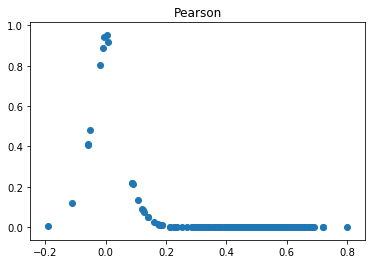

In [46]:
# This plot won't show the x/y labels no matter what I do
# I read that the scatter plot is bugged for Jupyter, so the next block is a work-around
plt.clf()

ax4= plt.gca()

ax4.title.set_text('Pearson')
ax4.set_xlabel='Co-efficient'
ax4.set_ylabel='p-values'
plt.scatter(df_pearson['coef'], df_pearson['p-value'])
#plt.xlabel = "Co-efficient"
#plt.ylabel = 'p-values'
#plt.show()




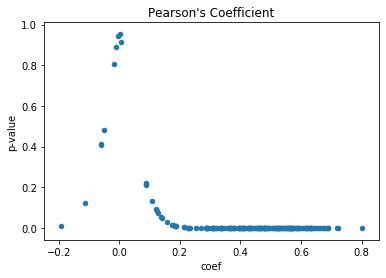

In [47]:
df_pearson.plot.scatter(x='coef', y='p-value', title="Pearson's Coefficient")

# Interpretting the Analysis

Now that we've gotten the results for the analysis, we need to interpret it.
We're going to divide the results into High Degree, Moderate Degree, Low Degree, and No correlation.
This link will be used as a reference: https://www.statisticssolutions.com/pearsons-correlation-coefficient/

### Correlation values:
- 4: High Degree: Between +/- 0.50 and +/- 1
- 3: Moderate Degree: Between +/- 0.30 and +/- 0.49
- 2: Low Degree: Between +/- 0.29 and 0
- 1: No correlation: 0



In [48]:
df_pearson.index

RangeIndex(start=0, stop=184, step=1)

In [49]:
for r in df_pearson.index:
    c = abs(df_pearson.at[r, 'coef'])
    if c >= 0.5 and c <= 1:
        rank = 4
    elif c >= 0.30 and c <= 0.49:
        rank = 3
    elif c >= 0.29 and c < 0.00:
        rank = 2
    else:
        rank = 1
    
    p = df_pearson.at[r, 'p-value']
    if p >= 0.05:
        s = 0
    else:
        s = 1
        
    df_pearson.loc[r, 'rank'] = rank
    df_pearson.loc[r, 'significance'] = s

df_pearson

,county,coef,p-value,rank,significance
0,anderson,0.336202,1.545678e-06,3.0,1.0
1,andrews,0.310388,1.005333e-05,3.0,1.0
2,angelina,0.412432,2.084404e-09,3.0,1.0
3,aransas,0.310198,1.018594e-05,3.0,1.0
4,atascosa,0.331784,2.155921e-06,3.0,1.0
...,...,...,...,...,...
179,wilson,0.366136,1.410511e-07,3.0,1.0
180,winkler,-0.005147,9.430694e-01,1.0,0.0
181,wise,0.585315,2.558835e-19,4.0,1.0
182,wood,0.636573,1.501569e-23,4.0,1.0


In [66]:
print(df_pearson.groupby('rank').count())
print(df_pearson.groupby('significance').count())
r4s1 = df_pearson.query('rank == 4.0 and significance == 1')['county'].count()
r4s0 = df_pearson.query('rank == 4.0 and significance == 0')['county'].count()

r3s1 = df_pearson.query('rank == 3.0 and significance == 1')['county'].count()
r3s0 = df_pearson.query('rank == 3.0 and significance == 0')['county'].count()

r2s1 = df_pearson.query('rank == 2.0 and significance == 1')['county'].count()
r2s0 = df_pearson.query('rank == 2.0 and significance == 0')['county'].count()

r1s1 = df_pearson.query('rank == 1.0 and significance == 1')['county'].count()
r1s0 = df_pearson.query('rank == 1.0 and significance == 0')['county'].count()

print("\nHigh Degree Correlation values")
print("Significant: ", r4s1, "/", df_pearson['county'].count())
print("Not Significant: ", df_pearson.query('rank == 4.0 and significance == 0')['county'].count(), "/", df_pearson['county'].count())

print("\nModerate Degree Correlation values")
print("Significant: ", df_pearson.query('rank == 3.0 and significance == 1')['county'].count(), "/", df_pearson['county'].count())
print("Not Significant: ", df_pearson.query('rank == 3.0 and significance == 0')['county'].count(), "/", df_pearson['county'].count())

print("\nLow Degree Correlation values")
print("Significant: ", df_pearson.query('rank == 2.0 and significance == 1')['county'].count(), "/", df_pearson['county'].count())
print("Not Significant: ", df_pearson.query('rank == 2.0 and significance == 0')['county'].count(), "/", df_pearson['county'].count())

print("\nNo Correlation values")
print("Significant: ", df_pearson.query('rank == 1.0 and significance == 1')['county'].count(), "/", df_pearson['county'].count())
print("Not Significant: ", df_pearson.query('rank == 1.0 and significance == 0')['county'].count(), "/", df_pearson['county'].count())


      county  coef  p-value  significance
rank                                     
1.0       45    44       44            45
3.0       71    71       71            71
4.0       68    68       68            68
              county  coef  p-value  rank
significance                             
0.0               17    17       17    17
1.0              167   166      166   167

High Degree Correlation values
Significant:  68 / 184
Not Significant:  0 / 184

Moderate Degree Correlation values
Significant:  71 / 184
Not Significant:  0 / 184

Low Degree Correlation values
Significant:  0 / 184
Not Significant:  0 / 184

No Correlation values
Significant:  28 / 184
Not Significant:  17 / 184


28 17
[68, 71, 0, 45]


<Figure size 432x288 with 0 Axes>

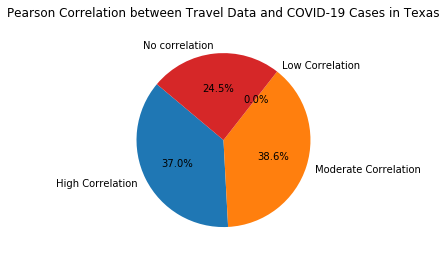

In [81]:
#Distribution of Correlation values for Texas Counties
plt.clf()
print(r1s1,r1s0)
#labels = 'High Correlation (\u00B1 0.50 <= coef <= \u00B1 1)', 'Moderate Correlation (\u00B1 0.30 <= coef <= \u00B1 0.49)', 'Low Correlation (0 < coef <= \u00B1 0.29)', 'No correlation (coef == 0)'
labels = 'High Correlation', 'Moderate Correlation', 'Low Correlation', 'No correlation'
sizes = [r4s1+r4s0, r3s1+r3s0, r2s1+r2s0, r1s1+r1s0]
print(sizes)
fig1, ax1 = plt.subplots()
ax1.set_title('Pearson Correlation between Travel Data and COVID-19 Cases in Texas', pad=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax.axis('equal')
plt.show()